In [30]:
#Load and resample data

In [31]:
import sys
import os
sys.path.append(os.path.abspath('../src'))

In [32]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [33]:
import pandas as pd

In [34]:
from preprocessing import load_and_resample_data, split_and_scale
from models import get_models, evaluate_model, cross_validate_model
from visualization import (
    plot_roc_curves,
    shap_summary_plot,
    plot_class_distribution,
    plot_correlation_heatmap,
    plot_confusion_matrix_heatmap
)
import joblib

In [35]:
#Load original data for EDA and visualization

In [36]:
original_data = pd.read_csv('../data/creditcard.csv')

In [37]:
#Load and resample data using SMOTE

In [38]:
X_resampled, y_resampled = load_and_resample_data('../data/creditcard.csv')

In [39]:
#Plot class distribution before and after SMOTE

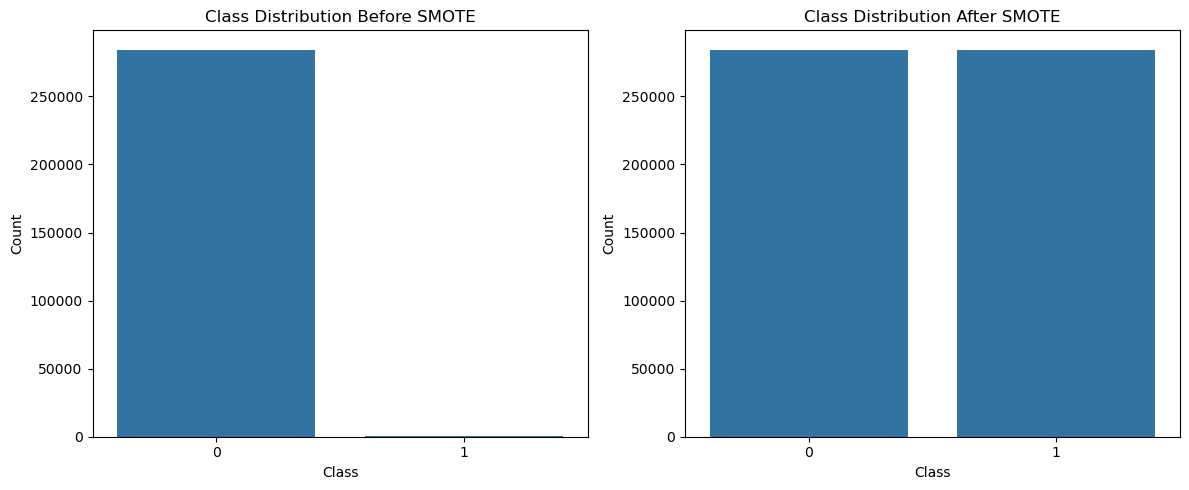

In [40]:
plot_class_distribution(original_data['Class'], y_resampled)

In [41]:
#Plot correlation heatmap for original features

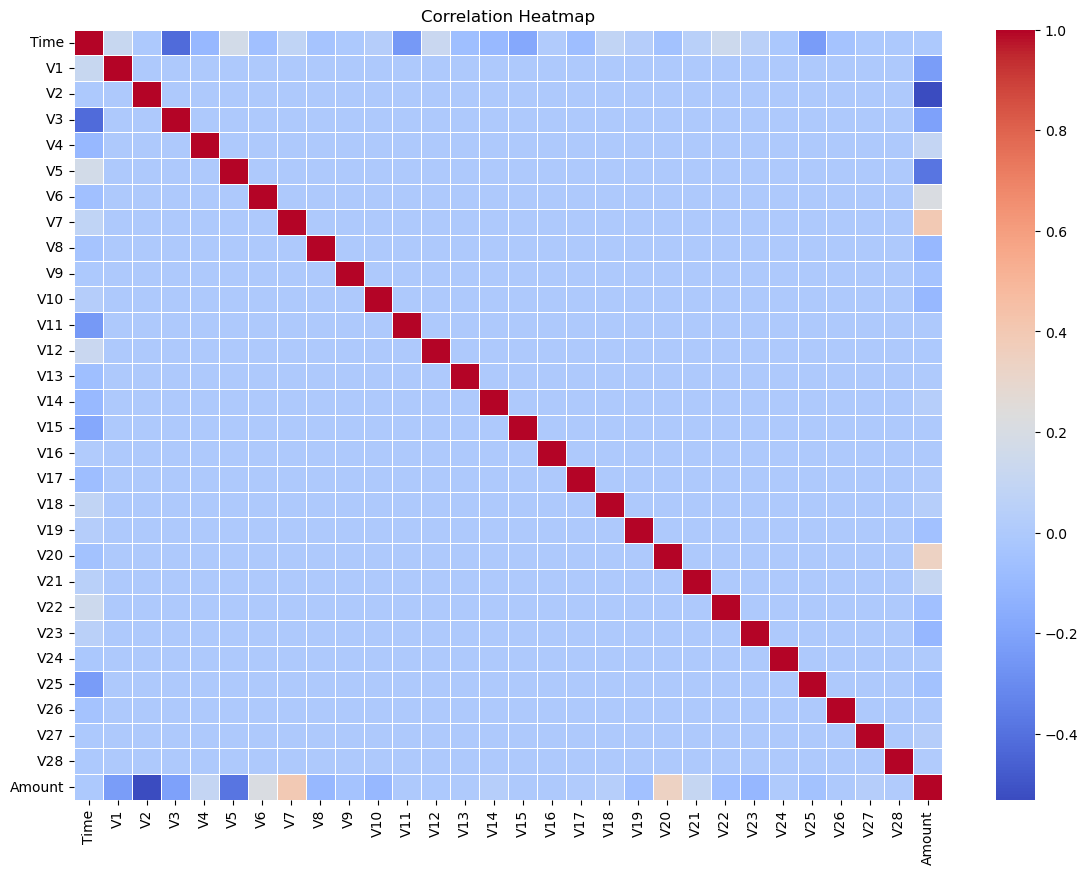

In [42]:
plot_correlation_heatmap(original_data.drop(columns='Class'))

In [43]:
#Split and scale data

In [44]:
X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled = split_and_scale(X_resampled, y_resampled)

In [45]:
#Train and evaluate all models

In [46]:
models = get_models()
results = []

for name, model in models.items():
    if name == "Logistic Regression":
        res = evaluate_model(name, model, X_train_scaled, X_test_scaled, y_train, y_test)
    else:
        res = evaluate_model(name, model, X_train, X_test, y_train, y_test)
    results.append(res)

--- Logistic Regression ---
Precision: 0.9907
Recall:    0.9702
F1-score:  0.9803
ROC-AUC:   0.9974
Confusion Matrix:
[[56343   520]
 [ 1692 55171]]

--- Random Forest ---
Precision: 0.9997
Recall:    1.0000
F1-score:  0.9998
ROC-AUC:   1.0000
Confusion Matrix:
[[56846    17]
 [    1 56862]]

--- XGBoost ---
Precision: 0.9996
Recall:    1.0000
F1-score:  0.9998
ROC-AUC:   1.0000
Confusion Matrix:
[[56841    22]
 [    0 56863]]

[LightGBM] [Info] Number of positive: 227452, number of negative: 227452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040001 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 454904, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
--- LightGBM ---
Precision: 0.9989
Recall:    0.9999
F1-score:

In [47]:
#Cross-validation

In [48]:
mean_auc, std_auc = cross_validate_model(models["Logistic Regression"], X_resampled, y_resampled)
print(f"Logistic Regression CV ROC-AUC: {mean_auc:.4f} ± {std_auc:.4f}")

Logistic Regression CV ROC-AUC: 0.9973 ± 0.0001


In [51]:
#Confusion matrix heatmap for XGBoost

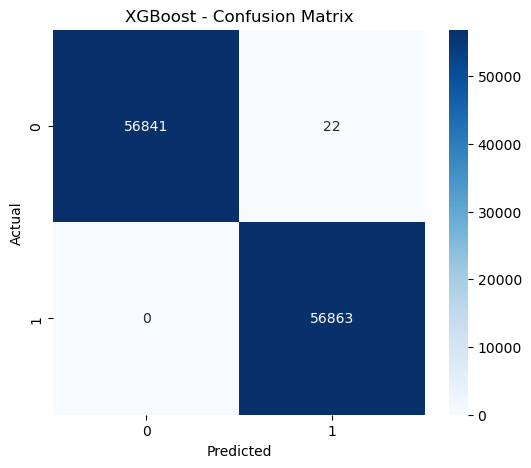

In [89]:
xgb_model = models['XGBoost']
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
plot_confusion_matrix_heatmap(y_test, xgb_preds, title="XGBoost - Confusion Matrix")

In [53]:
#SHAP summary plot for XGBoost

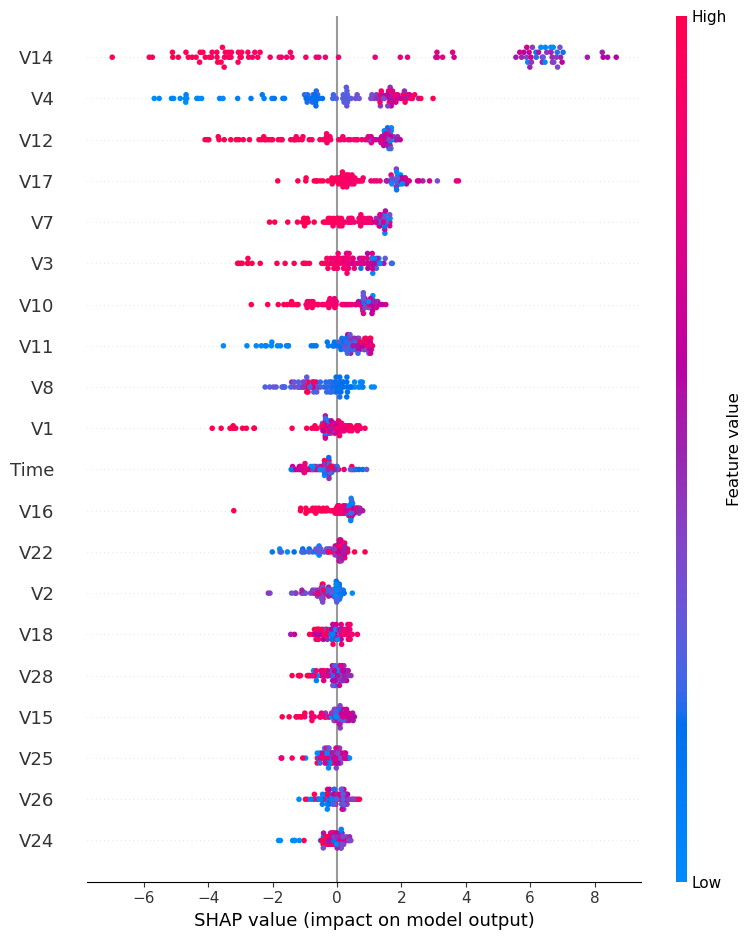

In [91]:
shap_summary_plot(xgb_model, X_test)

In [55]:
#ROC Curve Visualization

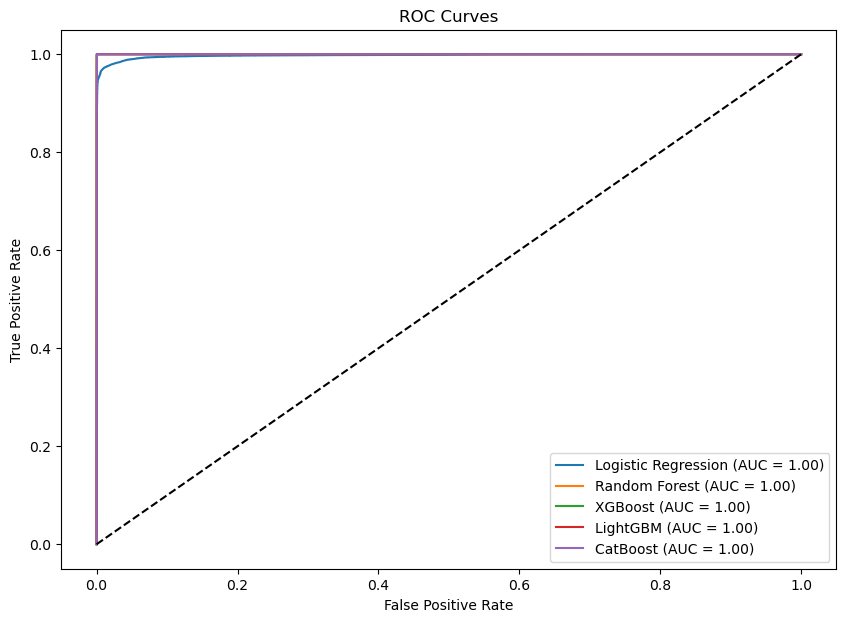

In [93]:
plot_roc_curves(models, X_test_scaled, X_test, y_test)

In [95]:
#Save the best model

In [58]:
joblib.dump(xgb_model, '../models/xgb_creditcard_model.joblib')
print("Model saved successfully.")

Model saved successfully.
